# Projeto de credit Scoring

In [1]:
import pandas as pd

In [2]:

url='https://raw.githubusercontent.com/alura-cursos/credit_scoring/main/base_dados_traduzida.csv'
dados = pd.read_csv(url)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   default                      1000 non-null   int64 
 1   conta_corrente               1000 non-null   object
 2   prazo_emprestimo_meses       1000 non-null   int64 
 3   historico_credito            1000 non-null   object
 4   proposito_emprestimo         1000 non-null   object
 5   valor_emprestimo             1000 non-null   int64 
 6   reserva_cc                   1000 non-null   object
 7   tempo_emprego_atual          1000 non-null   object
 8   taxa_comp_salario            1000 non-null   int64 
 9   sexo_est_civil               1000 non-null   object
 10  outros_fiadores              1000 non-null   object
 11  anos_residencia_atual        1000 non-null   int64 
 12  propriedade                  1000 non-null   object
 13  idade                        1000 

In [4]:
linhas = dados.shape[0]
colunas = dados.shape[1]

print('A base de dados tem %s linhas e %s colunas.'%(linhas, colunas))


A base de dados tem 1000 linhas e 21 colunas.


In [5]:
duplicados = dados.duplicated()
duplicados = duplicados.sum()
print('A base de dados tem %s dados duplicados.'%(duplicados))

A base de dados tem 0 dados duplicados.


In [6]:
nulos = dados.isnull()
nulos.sum()

default                        0
conta_corrente                 0
prazo_emprestimo_meses         0
historico_credito              0
proposito_emprestimo           0
valor_emprestimo               0
reserva_cc                     0
tempo_emprego_atual            0
taxa_comp_salario              0
sexo_est_civil                 0
outros_fiadores                0
anos_residencia_atual          0
propriedade                    0
idade                          0
outros_planos_financiamento    0
tipo_residencia                0
n_creditos_banco               0
status_emprego                 0
n_dependentes                  0
telefone                       0
trabalhador_estrangeiro        0
dtype: int64

In [7]:
chave = list(dados.conta_corrente.unique())
chave

['< 0 DM',
 '0 <= ... < 200 DM',
 'no checking account',
 '>= 200 DM / salary assignments for at least 1 year']

In [8]:
cols_subs = list(dados.select_dtypes(exclude='number').columns)

lista = []

for i in cols_subs:
  chave = list(dados[i].unique())
  n=0
  dicionario = {}
  for val in chave:
    n+=1
    dicionario[val]=n
  lista.append(dicionario)  
lista

[{'< 0 DM': 1,
  '0 <= ... < 200 DM': 2,
  'no checking account': 3,
  '>= 200 DM / salary assignments for at least 1 year': 4},
 {'critical account/ other credits existing (not at this bank)': 1,
  'existing credits paid back duly till now': 2,
  'delay in paying off in the past': 3,
  'no credits taken/ all credits paid back duly': 4,
  'all credits at this bank paid back duly': 5},
 {'domestic appliances': 1,
  '(vacation - does not exist?)': 2,
  'radio/television': 3,
  'car (new)': 4,
  'car (used)': 5,
  'business': 6,
  'repairs': 7,
  'education': 8,
  'furniture/equipment': 9,
  'retraining': 10},
 {'unknown/ no savings account': 1,
  '... < 100 DM': 2,
  '500 <= ... < 1000 DM ': 3,
  '.. >= 1000 DM ': 4,
  '100 <= ... < 500 DM': 5},
 {'.. >= 7 years': 1,
  '1 <= ... < 4 years': 2,
  '4 <= ... < 7 years': 3,
  'unemployed': 4,
  '... < 1 year ': 5},
 {'male : single': 1,
  'female : divorced/separated/married': 2,
  'male : divorced/separated': 3,
  'male : married/widowed': 

In [9]:
# cópia do df
dados_normais = dados.copy()

In [10]:
for i,val in zip(cols_subs, lista):
  dados[i] = dados[i].map(val)  

dados.head()  

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,1,1,1169,1,1,4,1,...,4,1,67,1,1,2,1,1,1,1
1,1,2,48,2,1,5951,2,2,2,2,...,2,1,22,1,1,1,1,1,2,1
2,0,3,12,1,2,2096,2,3,2,1,...,3,1,49,1,1,1,2,2,2,1
3,0,1,42,2,3,7882,2,3,2,1,...,4,2,45,1,2,1,1,2,2,1
4,1,1,24,3,4,4870,2,2,3,1,...,4,3,53,1,2,2,1,2,2,1


In [11]:
y = dados['default']
y.head()

0    0
1    1
2    0
3    0
4    1
Name: default, dtype: int64

In [12]:
x = dados.drop(columns='default')

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
seed=77
treino_x, teste_x, treino_y, teste_y = train_test_split(x,y,test_size = 0.3, random_state=seed)

In [15]:
base_treino = treino_x.shape[0]
base_teste = teste_x.shape[0]

print('a base de treino tem %s e a base de teste tem %s elemnetos.'%(base_treino,base_teste))

a base de treino tem 700 e a base de teste tem 300 elemnetos.


In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
modelo = LogisticRegression(max_iter=1000, random_state=seed)
modelo.fit(treino_x,treino_y)
print(modelo.score(treino_x,treino_y))

0.7457142857142857


In [18]:
previsoes = modelo.predict(teste_x)
previsoes

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0], d

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
acuracia = accuracy_score(teste_y, previsoes)
acuracia =round(acuracia, 3)*100
acuracia

76.7

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

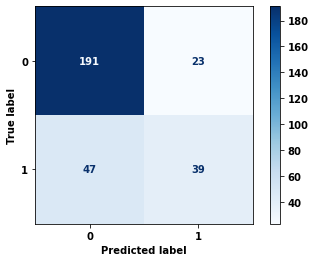

In [22]:
matriz_confusao = plot_confusion_matrix(modelo, teste_x, teste_y, cmap='Blues', values_format='.3g')
matriz_confusao

In [23]:
from sklearn.metrics import classification_report

In [24]:
print(classification_report(teste_y, previsoes))

              precision    recall  f1-score   support

           0       0.80      0.89      0.85       214
           1       0.63      0.45      0.53        86

    accuracy                           0.77       300
   macro avg       0.72      0.67      0.69       300
weighted avg       0.75      0.77      0.75       300



<font color='red'><strong>Acuracia</strong> de de 76.6% significa que a cada 100 casos ele acerta 77 </font>

<font color='blue'><strong>Precision</strong> = verdadeiros positivos/ ( verdadeiros positivos + falsos positivos) proporção de predições corretas de uma categoria em relação a todas as predições dessa categoria</font>

<font color='brown'><strong>Recall</strong> = verdadeiros positivos/ ( verdadeiros positivos + falsos negativos)
proporção de predições corretas da categoria alvo similar Sensibilidade</font>

<font color='black'><strong>f1-score</strong> = 2*((Precision*Recall)/(Precision+Recall)) Média harmõnica entre Precicion e Recall, resumo dessas duas métricas</font>

<font color='gray'><strong>Support</strong> = quantidade absouta encontrado em cada categoria</font>


roc_auc 0.7552705933492719


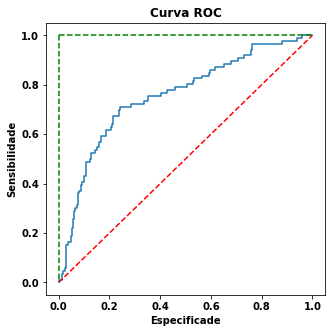

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score

prob_previsao = modelo.predict_proba(teste_x)[:,1]

#tvp = taxa de falsos positivos
#tvp = taxa de verdadeiros positivos

# vai definir qual vai ser a minha curva roc
tfp, tvp, limite = roc_curve(teste_y, prob_previsao)

# calcula qual é a área sob a curva roc através de uma integral
print('roc_auc', roc_auc_score(teste_y , prob_previsao)) 

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')

plt.plot(tfp, tvp)
plt.xlabel('Especificade') # taxa de falsos positivos
plt.ylabel('Sensibilidade') # taxa de verdadeiros positivo
plt.plot([0,1], ls="--", c = 'red')# plotando linha guia pontilhada vermelha
plt.plot([0,0],[1,0], ls="--", c = 'green'), plt.plot([1,1], ls= "--", c = 'green')  # plotando linha guia pontilhada vermelha
plt.show()

In [26]:
 variaveis_analises = ['sexo_est_civil', 'idade', 'prazo_emprestimo_meses', 'valor_emprestimo', 'default']
 dados[variaveis_analises].describe()

,sexo_est_civil,idade,prazo_emprestimo_meses,valor_emprestimo,default
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.686000,35.546000,20.903000,3271.258000,0.300000
std,0.931811,11.375469,12.058814,2822.736876,0.458487
min,1.000000,19.000000,4.000000,250.000000,0.000000
25%,1.000000,27.000000,12.000000,1365.500000,0.000000
50%,1.000000,33.000000,18.000000,2319.500000,0.000000
75%,2.000000,42.000000,24.000000,3972.250000,1.000000
max,4.000000,75.000000,72.000000,18424.000000,1.000000


In [27]:
dados['sexo_est_civil'].value_counts()

# temos 310 mulheres e 690 homens

1    548
2    310
4     92
3     50
Name: sexo_est_civil, dtype: int64

In [28]:
dados['default'].value_counts()

# a nossa base de dados é desbalanceada, por isso a acuracia não é um bom indicador

0    700
1    300
Name: default, dtype: int64

In [29]:
import seaborn as sns

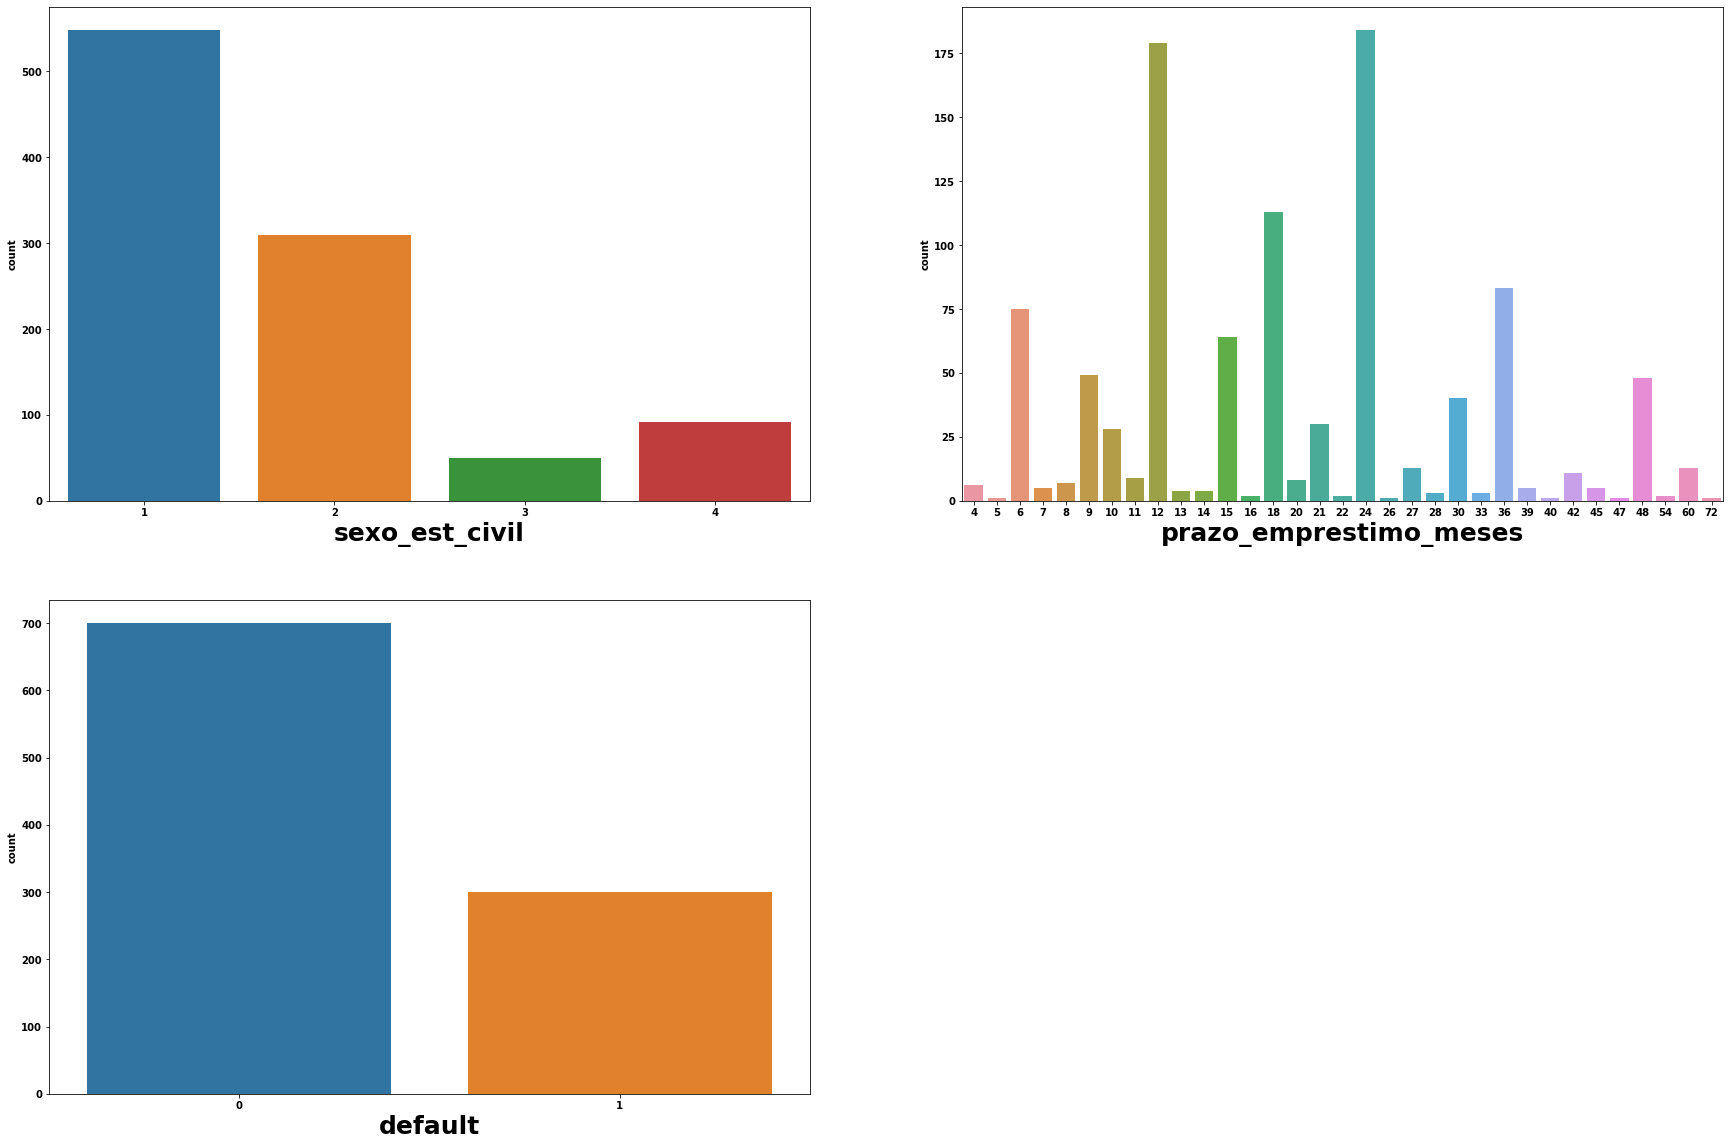

In [32]:
histogramas = ['sexo_est_civil', 'prazo_emprestimo_meses', 'default' ]

lista_histogramas = list(enumerate(histogramas))

plt.figure(figsize=(30,20))
for i in lista_histogramas:
    plt.subplot(2, 2, i[0]+1)
    sns.countplot(x= i[1], data= dados)
    plt.xlabel(xlabel=i[1] ,fontdict = {'size':25})

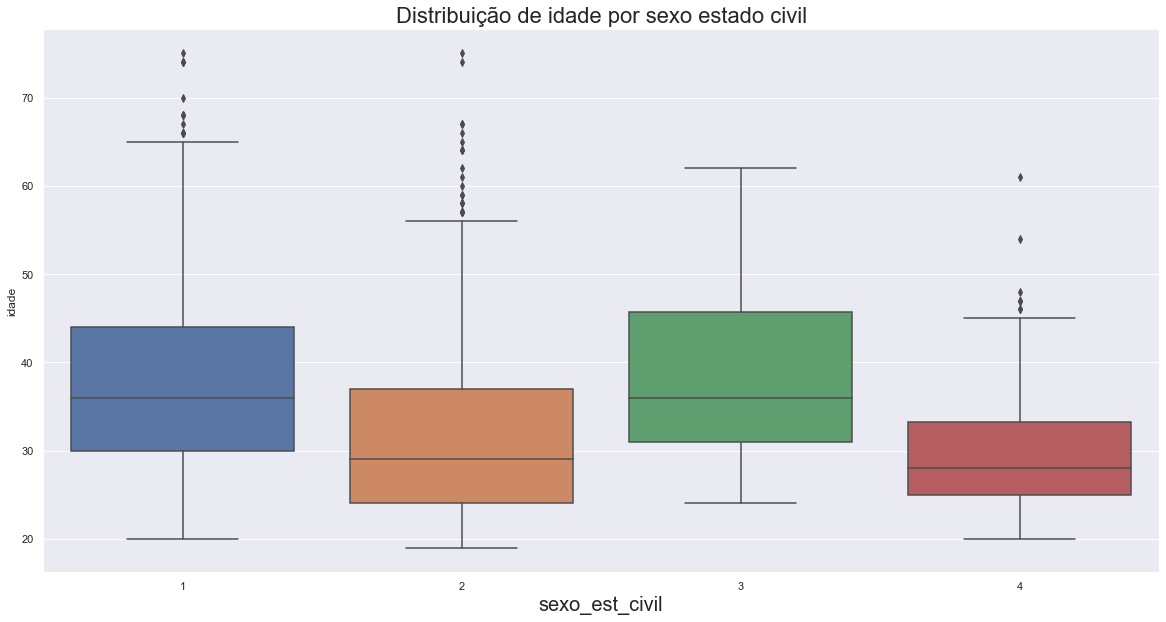

In [52]:
plt.figure(figsize=(20,10))
sns.boxplot(x= 'sexo_est_civil', y= 'idade', data= dados)
plt.title('Distribuição de idade por sexo estado civil', size=22)
plt.xlabel(xlabel='sexo_est_civil', fontdict={'size':20})
plt.show()

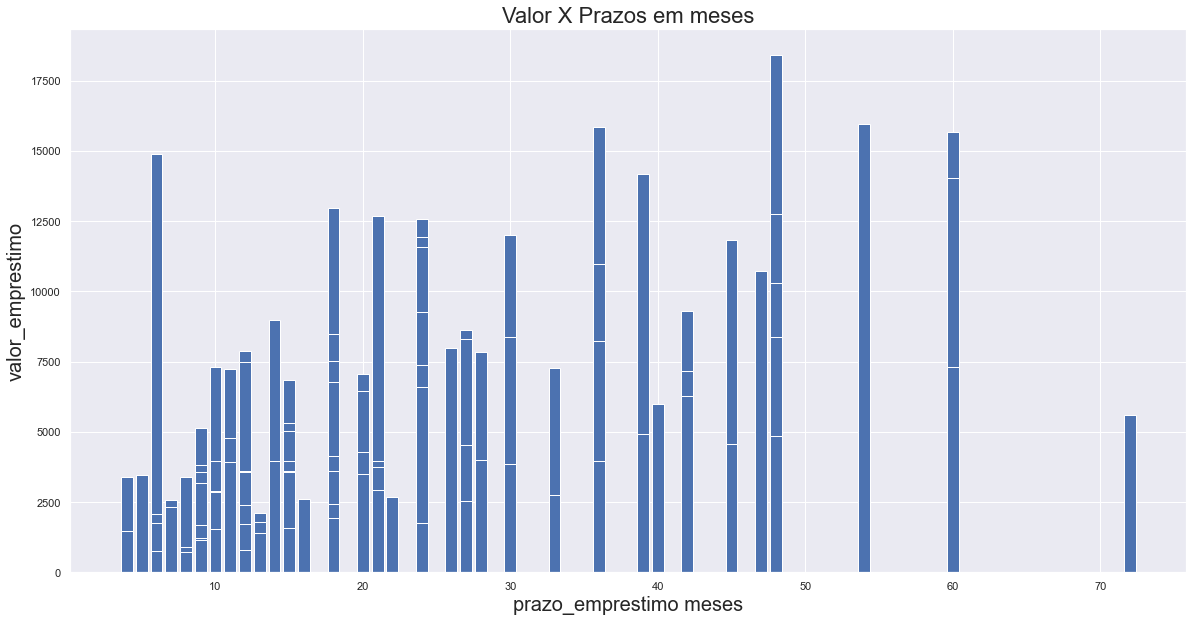

In [53]:
plt.figure(figsize=(20,10))
plt.bar(dados.prazo_emprestimo_meses, dados.valor_emprestimo)
plt.xlabel('prazo_emprestimo meses', fontdict={'size':20})
plt.ylabel('valor_emprestimo', fontdict={'size':20})
plt.title('Valor X Prazos em meses', size=22)
plt.show()

In [35]:
# categoria da variável sexo_est_civil
n=0
for i in dados_normais.sexo_est_civil.value_counts().index:
  n+=1
  print('(%s) =  %s'%(i,n))

(male : single) =  1
(female : divorced/separated/married) =  2
(male : married/widowed) =  3
(male : divorced/separated) =  4


In [36]:
# Criando variável sexo
## 1 = mulher
## 0 = homem

# Criando variável estado_civil
## 1 = solteiros
## 0 = casada/divorciada/viúva

dic_sexo = {2:1, 5:1, 1:0, 3:0, 4:0}
dic_est_civil = {3:1, 5:1, 1:0, 2:0, 4:0}

dados['sexo'] = dados['sexo_est_civil'].map(dic_sexo)
dados['estado_civil'] = dados['sexo_est_civil'].map(dic_est_civil)

dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo,estado_civil
0,0,1,6,1,1,1169,1,1,4,1,...,67,1,1,2,1,1,1,1,0,0
1,1,2,48,2,1,5951,2,2,2,2,...,22,1,1,1,1,1,2,1,1,0
2,0,3,12,1,2,2096,2,3,2,1,...,49,1,1,1,2,2,2,1,0,0
3,0,1,42,2,3,7882,2,3,2,1,...,45,1,2,1,1,2,2,1,0,0
4,1,1,24,3,4,4870,2,2,3,1,...,53,1,2,2,1,2,2,1,0,0


In [37]:
# função roda_modelo: ajuste e validação

def roda_modelo(base_dados, classificador):

# separando  a base de modelagem e variavel resposta
  y = base_dados['default']
  
  x = base_dados.drop(columns='default')

# separando a base de treino e teste
  SEED = 77
  
  treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size= 0.3, random_state= SEED)
  
  base_treino = treino_x.shape[0] 
  
  base_teste = teste_x.shape[0]
  
  print('A base de treino tem %s elementos e a base de teste tem %s elementos.'%(base_treino,base_teste))
  
  print(100*'-')
# Ajustando modelo com a base de teste

  modelo = classificador  
  
  modelo.fit(treino_x, treino_y)
  
  print(100*'-')

# Matrix de Confusão

  matriz_confusao = plot_confusion_matrix(modelo, teste_x, teste_y, values_format='.3g', cmap='Blues')
  
  plt.title('Matriz de Confusão')
  
  plt.show()
  
  print(100*'-')


# Classification Report

  previsoes = modelo.predict(teste_x)
  
  print(100*'-')
  
  print('/nClassification Report:')
  
  print(classification_report(teste_y, previsoes) )


# Curva ROC e AUC
  print(100*'-')
  
  prob_previsao = modelo.predict_log_proba(teste_x)[:,1]

  
  tfp, tvp, limite = roc_curve(teste_y, prob_previsao)
  
  print('roc_AUC', roc_auc_score(teste_y, prob_previsao))
  
  plt.subplots(1, figsize=(5,5))
  
  plt.title('Curva ROC')
  
  plt.plot(tfp, tvp)
  
  plt.xlabel('Especificidade')
  
  plt.ylabel('Sensibilidade') # taxa de verdadeiros positivo
  
  plt.plot([0,1], ls="--", c = 'red')# plotando linha guia pontilhada vermelha
  
  plt.plot([0,0],[1,0], ls="--", c = 'green'), plt.plot([1,1], ls= "--", c = 'green')  # plotando linha guia pontilhada vermelha
  
  plt.show()
  
  return modelo, matriz_confusao

In [38]:
# Função para retirar colunas da base de dados

colunas_retiradas = ['sexo_est_civil', 'sexo']
base_dados = dados.drop(columns=colunas_retiradas)

A base de treino tem 700 elementos e a base de teste tem 300 elementos.
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


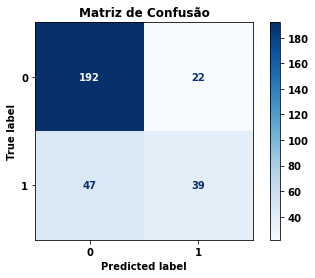

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
/nClassification Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       214
           1       0.64      0.45      0.53        86

    accuracy                           0.77       300
   macro avg       0.72      0.68      0.69       300
weighted avg       0.76      0.77      0.76       300

----------------------------------------------------------------------------------------------------
roc_AUC 0.7516844164312105


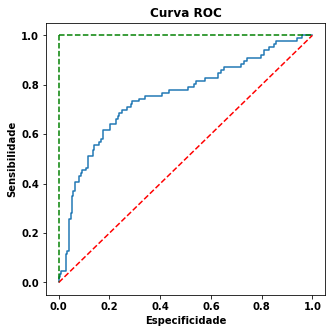

(LogisticRegression(max_iter=1000),
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x2098dcf7c10>)

In [39]:
roda_modelo(dados, LogisticRegression(max_iter=1000)) 

A base de treino tem 700 elementos e a base de teste tem 300 elementos.
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


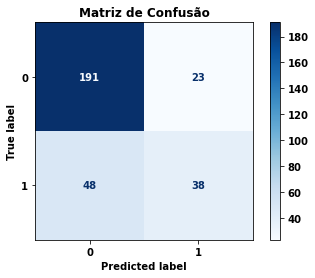

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
/nClassification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       214
           1       0.62      0.44      0.52        86

    accuracy                           0.76       300
   macro avg       0.71      0.67      0.68       300
weighted avg       0.75      0.76      0.75       300

----------------------------------------------------------------------------------------------------
roc_AUC 0.7627689632688546


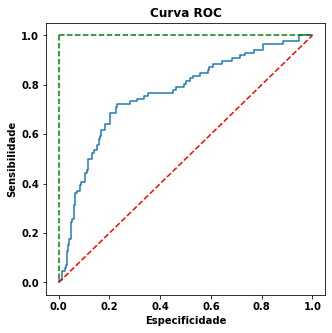

(LogisticRegression(max_iter=1000),
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x2098df328e0>)

In [40]:
roda_modelo(base_dados, LogisticRegression(max_iter=1000)) 


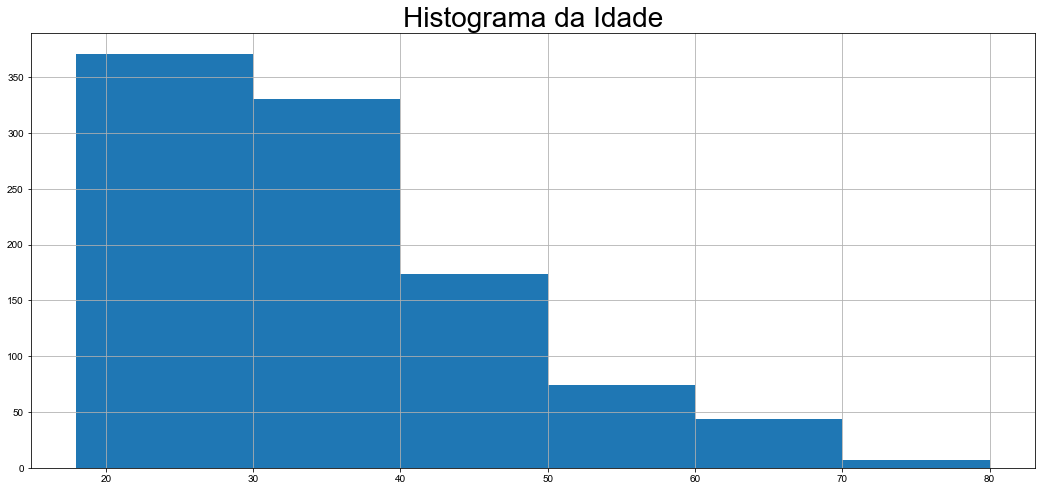

In [41]:
dados.idade.hist(bins=[18,30,40,50,60,70,80],  figsize=(18,8) )
sns.set()
plt.title('Histograma da Idade', size=28)
plt.show()

In [42]:
# Criar a coluna faixa_idade

dados['faixa_idade']  = pd.cut(x = dados['idade'], bins=[18,30,40,50,60,70,80], labels=[1,2,3,4,5,6])
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo,estado_civil,faixa_idade
0,0,1,6,1,1,1169,1,1,4,1,...,1,1,2,1,1,1,1,0,0,5
1,1,2,48,2,1,5951,2,2,2,2,...,1,1,1,1,1,2,1,1,0,1
2,0,3,12,1,2,2096,2,3,2,1,...,1,1,1,2,2,2,1,0,0,3
3,0,1,42,2,3,7882,2,3,2,1,...,1,2,1,1,2,2,1,0,0,3
4,1,1,24,3,4,4870,2,2,3,1,...,1,2,2,1,2,2,1,0,0,4


In [43]:
# criando 'faixa_prazo_emprestimo' para variavel 'prazo_emprestimo_meses'

dados['faixa_prazo_emprestimo']  = pd.cut(x = dados['prazo_emprestimo_meses'], bins=[1,12,24,36,48,60,72], labels=[1,2,3,4,5,6])
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo,estado_civil,faixa_idade,faixa_prazo_emprestimo
0,0,1,6,1,1,1169,1,1,4,1,...,1,2,1,1,1,1,0,0,5,1
1,1,2,48,2,1,5951,2,2,2,2,...,1,1,1,1,2,1,1,0,1,4
2,0,3,12,1,2,2096,2,3,2,1,...,1,1,2,2,2,1,0,0,3,1
3,0,1,42,2,3,7882,2,3,2,1,...,2,1,1,2,2,1,0,0,3,4
4,1,1,24,3,4,4870,2,2,3,1,...,2,2,1,2,2,1,0,0,4,2


In [45]:
# faixa_valor_emprestimo

dados['faixa_valor_emprestimo'] = pd.cut(x = dados['valor_emprestimo'], bins=[1, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000], 
                                         labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo,estado_civil,faixa_idade,faixa_prazo_emprestimo,faixa_valor_emprestimo
0,0,1,6,1,1,1169,1,1,4,1,...,2,1,1,1,1,0,0,5,1,2
1,1,2,48,2,1,5951,2,2,2,2,...,1,1,1,2,1,1,0,1,4,6
2,0,3,12,1,2,2096,2,3,2,1,...,1,2,2,2,1,0,0,3,1,3
3,0,1,42,2,3,7882,2,3,2,1,...,1,1,2,2,1,0,0,3,4,8
4,1,1,24,3,4,4870,2,2,3,1,...,2,1,2,2,1,0,0,4,2,5


In [46]:
#funcao para retirar colunas da base de dados

colunas_retiradas = ['sexo_est_civil', 'sexo', 'idade', 'prazo_emprestimo_meses', 'valor_emprestimo']
base_dados = dados.drop(columns=colunas_retiradas)
base_dados.head()

,default,conta_corrente,historico_credito,proposito_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,anos_residencia_atual,propriedade,...,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,estado_civil,faixa_idade,faixa_prazo_emprestimo,faixa_valor_emprestimo
0,0,1,1,1,1,1,4,1,4,1,...,1,2,1,1,1,1,0,5,1,2
1,1,2,2,1,2,2,2,1,2,1,...,1,1,1,1,2,1,0,1,4,6
2,0,3,1,2,2,3,2,1,3,1,...,1,1,2,2,2,1,0,3,1,3
3,0,1,2,3,2,3,2,2,4,2,...,2,1,1,2,2,1,0,3,4,8
4,1,1,3,4,2,2,3,1,4,3,...,2,2,1,2,2,1,0,4,2,5


A base de treino tem 700 elementos e a base de teste tem 300 elementos.
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


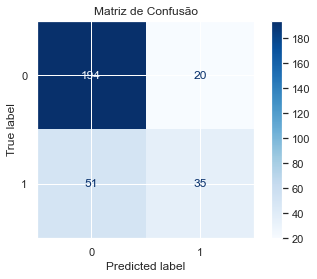

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
/nClassification Report:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       214
           1       0.64      0.41      0.50        86

    accuracy                           0.76       300
   macro avg       0.71      0.66      0.67       300
weighted avg       0.75      0.76      0.75       300

----------------------------------------------------------------------------------------------------
roc_AUC 0.7688545968267768


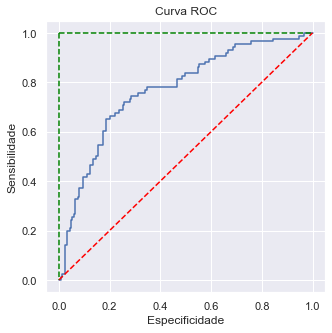

(LogisticRegression(max_iter=1000),
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x2098c7bfa00>)

In [47]:
#roda novamente o modelo
roda_modelo(base_dados, LogisticRegression(max_iter=1000))

In [48]:
colunas_retiradas = ['sexo_est_civil', 'sexo', 'idade', 'prazo_emprestimo_meses', 'valor_emprestimo']
base_dados = dados.drop(columns=colunas_retiradas)
base_dados.head()

,default,conta_corrente,historico_credito,proposito_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,anos_residencia_atual,propriedade,...,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,estado_civil,faixa_idade,faixa_prazo_emprestimo,faixa_valor_emprestimo
0,0,1,1,1,1,1,4,1,4,1,...,1,2,1,1,1,1,0,5,1,2
1,1,2,2,1,2,2,2,1,2,1,...,1,1,1,1,2,1,0,1,4,6
2,0,3,1,2,2,3,2,1,3,1,...,1,1,2,2,2,1,0,3,1,3
3,0,1,2,3,2,3,2,2,4,2,...,2,1,1,2,2,1,0,3,4,8
4,1,1,3,4,2,2,3,1,4,3,...,2,2,1,2,2,1,0,4,2,5


In [49]:
#treinar modelo com a base inteira

modelo = LogisticRegression(max_iter=1000)
y = base_dados['default']
x= base_dados.drop(columns = 'default')
modelo.fit(x,y)

LogisticRegression(max_iter=1000)